# Ensemble Methods Notebook
Welcome to the weekly project on Ensemble Methods. You will be working with a dataset of traffic jams.

## Dataset
The dataset that will be used in this task is `Traffic_Jam.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
This dataset contains traffic data including various counts of vehicle types across different times and days. Below are samples of these columns:

* `Time`: The timestamp of the traffic count (in intervals).
* `Date`: The day of the month the data was recorded.
* `Day of the Week`: The day of the week for the recorded data.
* `CarCount`: The number of cars counted during the time interval.
* `BikeCount`: The number of bikes counted during the time interval.
* `BusCount`: The number of buses counted during the time interval.
* `TruckCount`: The number of trucks counted during the time interval.
* `Total`: Total vehicles counted during the time interval.
* `Traffic Situation`: Qualitative assessment of the traffic (e.g., normal, congested).

## Goal
The primary goal of this exam is to develop a predictive model capable of determining the `Traffic Situation` based on your choice of features provided in the dataset. Students are expected to apply ensemble methods to build and evaluate their models.

# Import Libraries

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, BaggingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# Load the dataset


In [87]:
df = pd.read_csv('Traffic_Jams.csv')

df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


# Exploratory Data Analysis (EDA)

Below are some steps and visualizations to perform EDA on the dataset:

1. **Summary Statistics**: Obtain summary statistics for the dataset to understand the central tendencies and dispersion of numerical features.describe()

2. **Distribution of the Target Variable**: Analyze the distribution of the target variable `Traffic Situation` to understand the class balance.

3. **Correlation Analysis**: Analyze correlations between features.

In [88]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000
mean,16.043327,64.355629,12.013283,12.557875,18.658128,107.584915
std,8.956907,44.307088,11.363955,12.319831,10.724822,55.850784
min,1.000000,5.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,18.000000,3.000000,1.000000,10.000000,53.000000
50%,16.000000,61.000000,9.000000,10.000000,18.000000,103.000000
75%,24.000000,101.250000,19.000000,20.000000,27.000000,151.000000
max,31.000000,180.000000,70.000000,50.000000,60.000000,279.000000


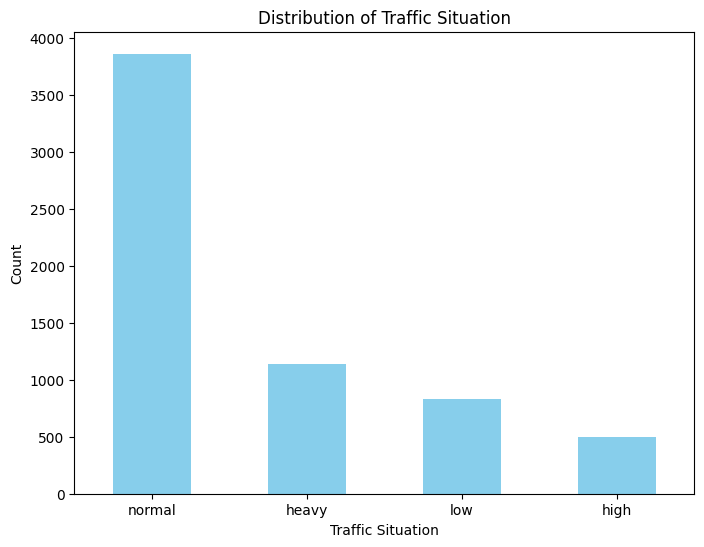

In [89]:
traffic_situation = df['Traffic Situation'].value_counts()

plt.figure(figsize=(8, 6))
traffic_situation.plot(kind='bar', color='skyblue')
plt.title('Distribution of Traffic Situation')
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

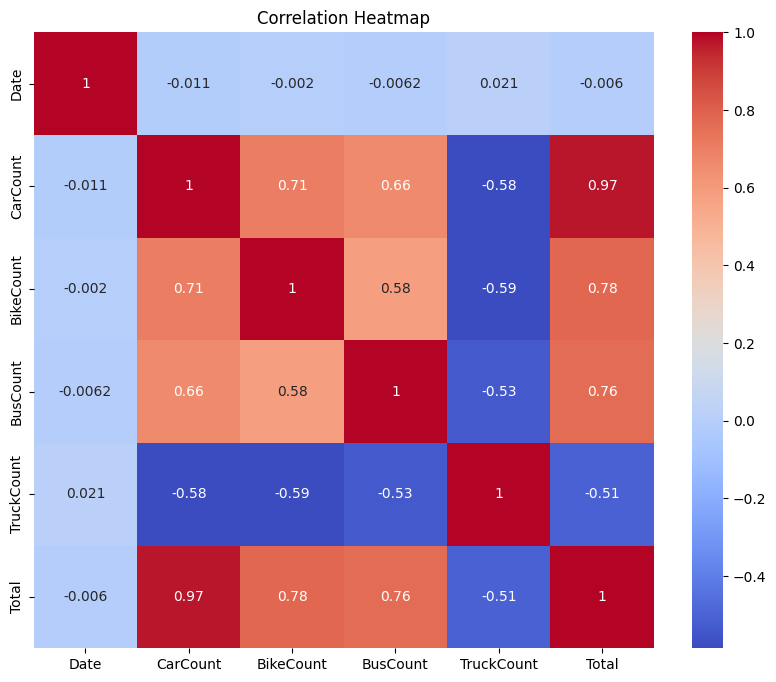

In [90]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Preprocess the data (if necessary)

Before building models, it's crucial to preprocess the data to ensure it's clean and suitable for training. Follow these steps to prepare the dataset:

1. **Check for Missing Values**: Determine if there are any missing values in the dataset and handle them appropriately. You can choose to fill them with a mean, median, or mode value, or drop rows with missing values if necessary.

2. **Encode Categorical Variables**: Convert categorical variables into numerical representations. This can be done using techniques such as one-hot encoding and lable-encoder.

3. **Feature Scaling**: Standardize or Normalize numerical features if needed to have a consistent scale.

4. **Remove Unnecessary Columns**: Drop any columns that are not relevant for modeling.

In [91]:
missing_values = df.isnull().sum()
missing_values

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [92]:
data_encoded = pd.get_dummies(df, columns=['Day of the week', 'Traffic Situation'], drop_first=True)
data_encoded.head()

,Time,Date,CarCount,BikeCount,BusCount,TruckCount,Total,Day of the week_Monday,Day of the week_Saturday,Day of the week_Sunday,Day of the week_Thursday,Day of the week_Tuesday,Day of the week_Wednesday,Traffic Situation_high,Traffic Situation_low,Traffic Situation_normal
0,12:00:00 AM,10,13,2,2,24,41,False,False,False,False,True,False,False,False,True
1,12:15:00 AM,10,14,1,1,36,52,False,False,False,False,True,False,False,False,True
2,12:30:00 AM,10,10,2,2,32,46,False,False,False,False,True,False,False,False,True
3,12:45:00 AM,10,10,2,2,36,50,False,False,False,False,True,False,False,False,True
4,1:00:00 AM,10,11,2,1,34,48,False,False,False,False,True,False,False,False,True


In [93]:
numerical_features = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']
scaler = StandardScaler()
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])

In [94]:
dropped_columns = ['Time', 'Date']
data = data_encoded.drop(columns=dropped_columns)

data.head()

,CarCount,BikeCount,BusCount,TruckCount,Total,Day of the week_Monday,Day of the week_Saturday,Day of the week_Sunday,Day of the week_Thursday,Day of the week_Tuesday,Day of the week_Wednesday,Traffic Situation_high,Traffic Situation_low,Traffic Situation_normal
0,-1.159175,-0.881214,-0.857050,0.498124,-1.192287,False,False,False,False,True,False,False,False,True
1,-1.136604,-0.969218,-0.938226,1.617112,-0.995318,False,False,False,False,True,False,False,False,True
2,-1.226890,-0.881214,-0.857050,1.244116,-1.102756,False,False,False,False,True,False,False,False,True
3,-1.226890,-0.881214,-0.857050,1.617112,-1.031131,False,False,False,False,True,False,False,False,True
4,-1.204319,-0.881214,-0.938226,1.430614,-1.066943,False,False,False,False,True,False,False,False,True


# Visualize the Data

Visualizing the data helps in understanding the relationships between features and the target variable. Below are some common visualizations that can be used to gain insights into the dataset:

1. **Count Plots for Categorical Features**: Use count plots to visualize the frequency of categorical features such as the `Traffic Situation`.

2. **Correlation Heatmap**: Create a heatmap to visualize the correlation between numerical features and identify any strong relationships.

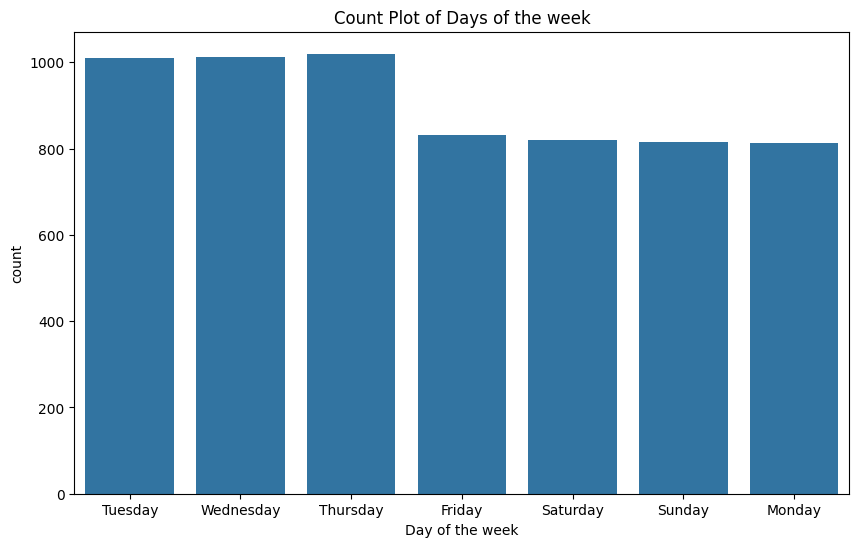

In [95]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Day of the week')
plt.title('Count Plot of Days of the week')
plt.show()

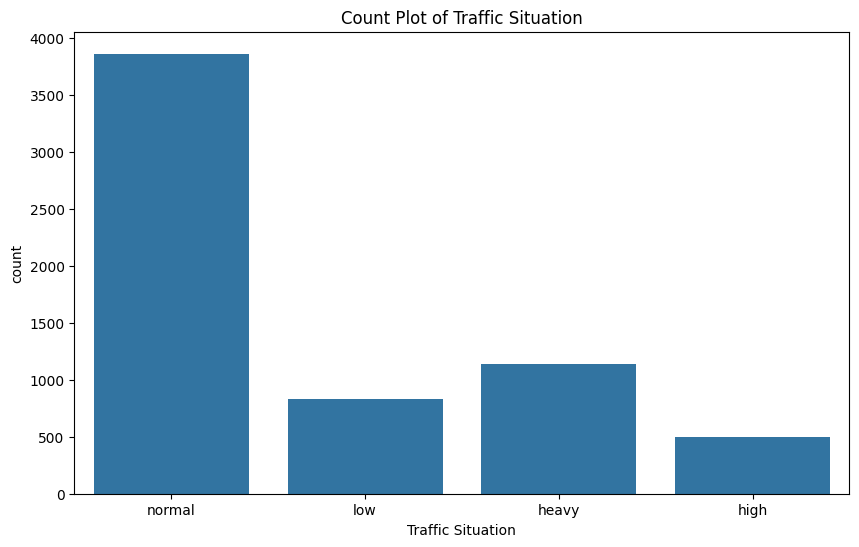

In [96]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Traffic Situation')
plt.title('Count Plot of Traffic Situation')
plt.show()

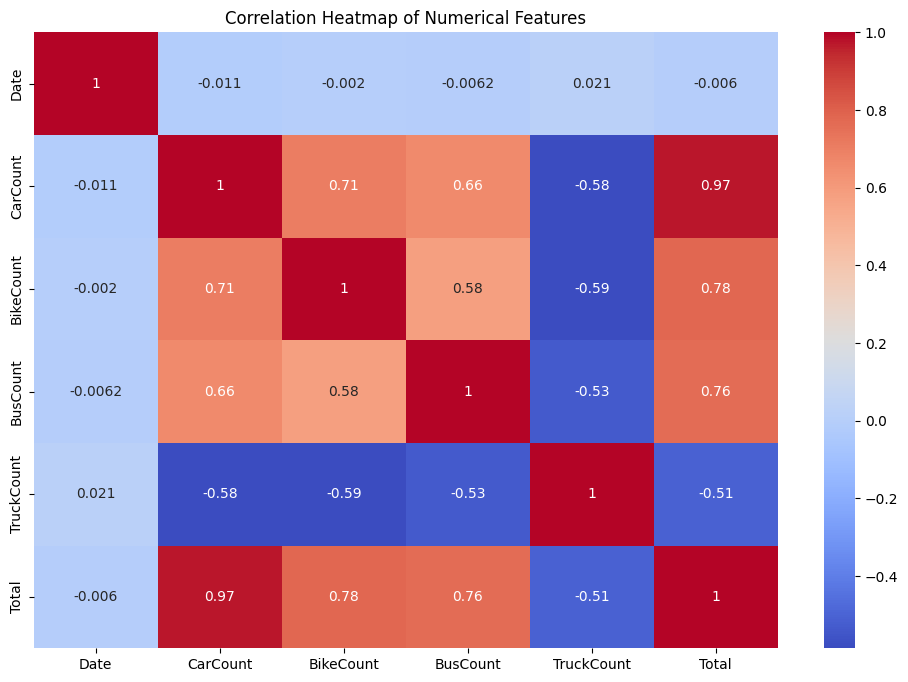

In [97]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Split the Dataset

1. **Define Features and Target**: Separate the dataset into features (`X`) and the target variable (`y`).

2. **Train-Test Split**: Use the `train_test_split` function from `sklearn.model_selection` to split the data.

In [98]:
X = data.drop(columns=['Traffic Situation_high', 'Traffic Situation_low', 'Traffic Situation_normal'])
y = data[['Traffic Situation_high', 'Traffic Situation_low', 'Traffic Situation_normal']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the Classifiers

## Bagging
Chose the bagging model to go with and initialize and train a the model.

In [99]:
y_train = np.argmax(y_train.values, axis=1)
y_test = np.argmax(y_test.values, axis=1)

bagging_model = BaggingClassifier(base_estimator= DecisionTreeClassifier(), n_estimators=100, random_state=42)

bagging_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

### Evaluate the model performance

In [100]:
y_pred = bagging_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.899604743083004
Confusion Matrix:
 [[300   0  22]
 [  0 115  34]
 [ 22  49 723]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       322
           1       0.70      0.77      0.73       149
           2       0.93      0.91      0.92       794

    accuracy                           0.90      1265
   macro avg       0.85      0.87      0.86      1265
weighted avg       0.90      0.90      0.90      1265



## Boosting
Chose the Boosting model to go with and initialize and train a the model.

In [80]:
boosting_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

boosting_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

### Evaluate the model performance

In [81]:
y_pred = boosting_model.predict(X_test)

accuracy_boost = accuracy_score(y_test, y_pred)
conf_matrix_boost = confusion_matrix(y_test, y_pred)
class_report_boost = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_boost)
print("Confusion Matrix:\n", conf_matrix_boost)
print("Classification Report:\n", class_report_boost)

Accuracy: 0.9225296442687747
Confusion Matrix:
 [[302   0  20]
 [  0 129  20]
 [ 11  47 736]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       322
           1       0.73      0.87      0.79       149
           2       0.95      0.93      0.94       794

    accuracy                           0.92      1265
   macro avg       0.88      0.91      0.89      1265
weighted avg       0.93      0.92      0.92      1265



## Stacking Classifier
Combine the previous classifiers as the base models using a Stacking Classifier.

In [82]:
estimators = [
    ('bagging', BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)),
    ('boosting', GradientBoostingClassifier(n_estimators=100, random_state=42))
]
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    passthrough=True
)

### Define meta-learner (LogisticRegression)

In [83]:
meta_learner = LogisticRegression(random_state=42)
meta_learner

LogisticRegression(random_state=42)

### Initialize and Train the Stacking Classifier

Stacking combines multiple models (base learners) using a meta-learner. The meta-learner is trained on the predictions of the base learners to make the final prediction.

In [84]:
stacking_model

StackingClassifier(estimators=[('bagging',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                                  n_estimators=100,
                                                  random_state=42)),
                               ('boosting',
                                GradientBoostingClassifier(random_state=42))],
                   final_estimator=LogisticRegression(), passthrough=True)

### Evaluate the model performance

In [85]:
stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_test)

accuracy_stack = accuracy_score(y_test, y_pred)
conf_matrix_stack = confusion_matrix(y_test, y_pred)
class_report_stack = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_stack)
print("Confusion Matrix:\n", conf_matrix_stack)
print("Classification Report:\n", class_report_stack)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Accuracy: 0.9636363636363636
Confusion Matrix:
 [[311   0  11]
 [  0 145   4]
 [ 12  19 763]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       322
           1       0.88      0.97      0.93       149
           2       0.98      0.96      0.97       794

    accuracy                           0.96      1265
   macro avg       0.94      0.97      0.95      1265
weighted avg       0.96      0.96      0.96      1265



# Notebook Questions:

After completing the tasks in this notebook, take some time to reflect on the work you have done and answer the following questions. These questions are designed to help you think critically about the steps you took and the decisions you made.

* **Feature Selection and Engineering**
   - Which features did you find most important for predicting churn, and why do you think they are significant?
   <br> **CarCount, BikeCount, BusCount, TruckCount, and Total. They are significant because they effect the level of traffic.**

   - Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?
   <br> **Yes:**
1. **One-Hot Encoding allowed the models to handle categorical data effectively.**
2. **Feature Scaling helped in improving the performance of Logistic Regression and Gradient Boosting.**
<br><br>
* **Model Selection**
   - Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?
   <br> **Bagging, to reduce the variance of the decision trees by averaging multiple models trained on different subsets of the data.** **Boosting, to improve model accuracy.**
  **Stacking, to combine the strengths of both Bagging and Boosting.**<br><br> **As for the advantages, Ensemble methods outperform single models because they combine the strengths from multiple models, reducing errors.**
<br><br>
   - Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?
   <br>**Bagging Model: reduced variance but may have been less effective at capturing complex relationships and showed good accuracy at 89%.** <br>**Boosting Model: Outperformed Bagging by focusing on correcting errors and reducing both bias and variance and showed good accuracy at 92%.** <br>**Stacking Model: combined the predictions of Bagging and Boosting models with Logistic Regression as the meta-learner and showed the best accuracy at 96%.**
<br><br>
* **Model Evaluation**
   - Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?
   <br> **Accuracy to measure the overall correctness of the model's predictions.**<br>**Confusion Matrix to list the true positives, true negatives, false positives and false negatives.**<br>**Classification Report include a more detailed evaluation than the accuracy alone.**
